# Data Wrangling Final Project Notebook
The following jupyter notebook will be a project on the Denver Nuggets American Basketball Association Team.

## importing the data, numpy and pandas

In [275]:
import pandas as pd
import numpy as np
nikRegSea = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/nikola_21_reg_season.csv')
mpjRegSea = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/mpj_21_reg_season.csv')
joelRegSea = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/joel_21_reg_season.csv')
facuRegSea = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/facu_21_reg_season.csv')
prevMvp = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/prev_MVP.csv')
nuggets = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/per_game.csv')
nugG2G = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/den_gmbygm.csv')
nugY2Y = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/nug_YearBy.csv')
lag2g = pd.read_csv('https://raw.githubusercontent.com/luke-a-white/CSU_DSCI_235_Project/main/la_g2g.csv')


The data choses for to answer the questions of this project are, Nikola jokic's regulaer season though all of the games, and the same for his team mates Facundo Campazzo and micheal Porter Jr. Another data set I will be using is Joel Emdiid's regular season data. Lastly I will be using all the prevoius MVPs basic stats from their respective seaseons. All of the data is orignaly owned by basketball reference and can be found though this link
https://www.basketball-reference.com/teams/DEN/2021.html

# Nikola Jokic MVP Candidicy 
In this segment of the project I will be showing stats that show that Jokic is a MVP canidate and the front runner to win the prestigious regular season award 

The following is Nikola Jokics regular season stats for the 2021 season. In the following cells I will get the data from the person second in the "MVP" race Joel Embiid then I will make a vector of the difference and use this to make the comparison

In [186]:
nuggets.set_index(["Rk", 'PTS/G'])
niktots = pd.DataFrame(nuggets.loc[1,:])
nikRegSea
nikRegSea2 = nikRegSea.loc[:,"FG":]
nikRegSeaVec = nikRegSea2.mean()
nikRegSeaVec

FG      10.223881
FGA     18.014925
FG%      0.578433
3P       1.373134
3PA      3.343284
3P%      0.416517
FT       4.552239
FTA      5.298507
FT%      0.848661
ORB      2.835821
DRB      8.059701
TRB     10.895522
AST      8.507463
STL      1.388060
BLK      0.701493
TOV      3.149254
PF       2.686567
PTS     26.373134
GmSc    25.567164
+/-      5.313433
dtype: float64

The following is the regaular season stats for the second most likley to get MVP Joel Embiid

In [191]:
joelRegSea2 = joelRegSea.loc[:,'FG':]
joelRegSea2 = joelRegSea2.replace("Did Not Dress", np.nan)
joelRegSea2 = joelRegSea2.replace("Inactive", np.nan)
joelRegSea2 = joelRegSea2.replace("Did Not Play", np.nan)
joelRegSea2 = joelRegSea2.replace(" ", np.nan)
joelRegSeaVec = joelRegSea2.astype('float64').mean()
print(pd.Series(joelRegSeaVec))

FG       9.250000
FGA     18.083333
FG%      0.508417
3P       1.166667
3PA      3.125000
3P%      0.413375
FT       9.562500
FTA     11.145833
FT%      0.860187
ORB      2.312500
DRB      8.520833
TRB     10.833333
AST      2.937500
STL      0.958333
BLK      1.416667
TOV      3.125000
PF       2.395833
PTS     29.229167
GmSc    23.735417
+/-      8.166667
dtype: float64


The next cell will be the differnce of Jokic and Embiid

In [188]:
nikRegSeaVec.subtract(joelRegSeaVec)

FG      0.973881
FGA    -0.068408
FG%     0.070016
3P      0.206468
3PA     0.218284
3P%     0.003142
FT     -5.010261
FTA    -5.847326
FT%    -0.011526
ORB     0.523321
DRB    -0.461132
TRB     0.062189
AST     5.569963
STL     0.429726
BLK    -0.715174
TOV     0.024254
PF      0.290734
PTS    -2.856032
GmSc    1.831748
+/-    -2.853234
dtype: float64

However if we take into account the amount of games missed and replace the "Nan" values as 0, we will see that avalabilty is the best ability.

In [196]:
joelRegSea3 = joelRegSea.loc[:,'FG':]
joelRegSea3 = joelRegSea3.replace("Did Not Dress", 0)
joelRegSea3 = joelRegSea3.replace("Inactive", 0)
joelRegSea3 = joelRegSea3.replace("Did Not Play", 0)
joelRegSea3 = joelRegSea3.replace(" ", 0)
joelRegSeaVec2 = joelRegSea3.astype('float64').mean()
nikRegSeaVec.subtract(joelRegSeaVec2)

FG      3.597015
FGA     5.059701
FG%     0.214194
3P      0.537313
3PA     1.104478
3P%     0.120367
FT     -2.298507
FTA    -2.686567
FT%     0.232408
ORB     1.179104
DRB     1.955224
TRB     3.134328
AST     6.402985
STL     0.701493
BLK    -0.313433
TOV     0.910448
PF      0.970149
PTS     5.432836
GmSc    8.562687
+/-    -0.537313
dtype: float64

After looking at both of the differnces we can see that nikola is better in almost every category compared to Joel


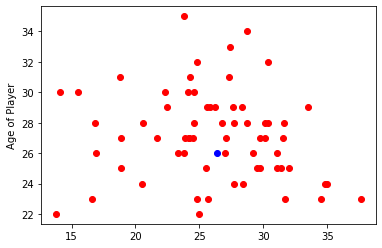

In [245]:
import matplotlib.pyplot as plt
prevMvp
points = prevMvp.loc[:, 'PTS']
y = prevMvp.loc[:, 'Age']
y
plt.scatter(points, y, color = 'red');
plt.ylabel('Age of Player');
plt.scatter(nikRegSeaVec["PTS"], 26, color = 'blue');

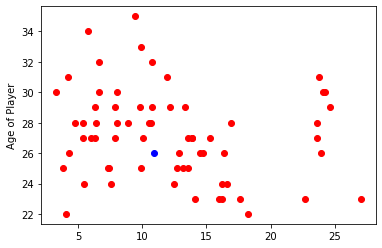

In [246]:
boards = prevMvp.loc[:, 'TRB']
y = prevMvp.loc[:, 'Age']
y
plt.scatter(boards, y, color = 'red');
plt.ylabel('Age of Player');
plt.scatter(nikRegSeaVec["TRB"],26, color = 'blue');

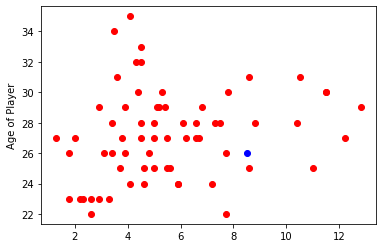

In [249]:
assists = prevMvp.loc[:, 'AST']
y = prevMvp.loc[:, 'Age']
y
plt.scatter(assists, y, color = 'red');
plt.ylabel('Age of Player');
plt.scatter(nikRegSeaVec["AST"],26, color = 'blue');

As you can see in the prevoius graphs Nikola Jokic is in the middle or better of all the major import stats among the leage MVPs in the prevoius years. Furthermore looking at the other front runner for the MVP award nikola Jokic is better in almost every category meaning he should be better.

# Team progression 
In this segment of the project I will show the progression of the nuggets though this season and the last few seasons

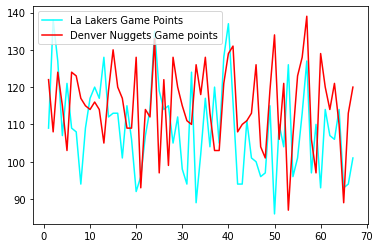

In [292]:
nugG2 = nugG2G.loc[:66, 'Rk':'PF']
nugG2
lag2 = lag2g.loc[:66, 'Rk':'PF']
plt.plot(nugG2.loc[:, 'Rk'], lag2.loc[:,'Tm'], label = 'La Lakers Game Points', color = 'Aqua')

plt.plot(nugG2.loc[:, 'Rk'], nugG2.loc[:,'Tm'], label = 'Denver Nuggets Game points', color = 'Red')
plt.legend(loc="upper left");

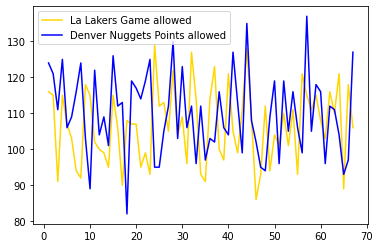

In [297]:
plt.plot(nugG2.loc[:, 'Rk'], lag2.loc[:,'Opp.1'], label = 'La Lakers Game allowed',  color = 'Gold')
plt.plot(nugG2.loc[:, 'Rk'], nugG2.loc[:,'Opp.1'], label = 'Denver Nuggets Points allowed', color = 'Blue')
plt.legend(loc="upper left");

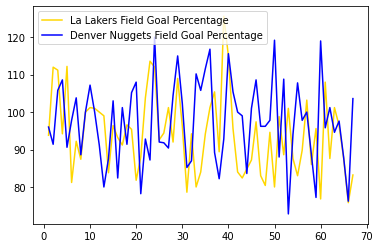

In [296]:
nugG2
plt.plot(nugG2.loc[:, 'Rk'], (lag2.loc[:,'FG%'])*200, label = 'La Lakers Field Goal Percentage', color = 'Gold')
plt.plot(nugG2.loc[:, 'Rk'], (nugG2.loc[:,'FG%'])*200, label = 'Denver Nuggets Field Goal Percentage',  color = 'Blue')
plt.legend(loc="upper left");

Lets First take a look at the nuggets Field Goal percentage thorough this season, this may seam gibberis data but I overlapped the points by the nuggets and the field goal percentage to give a season long graph of how they influence each other.


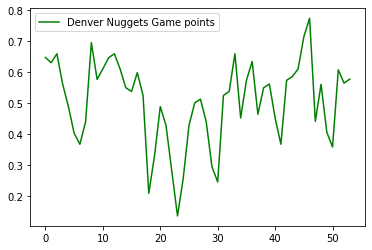

In [298]:
nugY2 = nugY2Y.loc[:, 'Season':'Rel DRtg']
nugY2
x = np.arange(0,54,1)
plt.plot(x,nugY2.loc[:, 'W/L%'], label = 'Denver Nuggets Game points', color = 'green')
plt.legend(loc="upper left");

When looking at the graph above it may seem up and down alot but each data point represents the nuggets win lose perecent though the teams just over 50 years, the graph is backwards just because of the source of the data but around the '18th' year you see a large spike then a massive dip at the '9th' year. This is becasue of a All Star player that denver drafted, the drop was the team trading him and going into a rebuild. this is the slow "descent"(becasue the data is reversed